In [1]:

# импорт необходимых библиотек
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm
import scipy.stats as st
from statsmodels.stats.power import tt_ind_solve_power
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats import proportion
from statsmodels.stats.meta_analysis import effectsize_smd
from typing import Union
from scipy import stats
from math import asin
import numpy as np

На основе выбранных продуктов из первого вебинара, выберите 2 A/B-теста и составьте план эксперимента, чтобы избежать Peeking Problem

Распишите, какие метрики и как вы будете анализировать
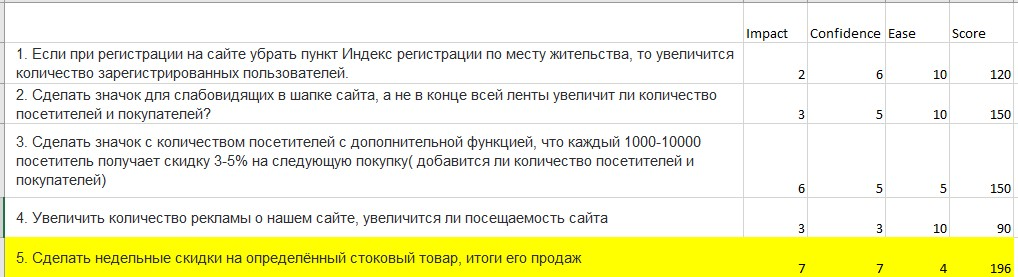

Выбираем гипотезу: 5. Если cделать недельные скидки на определённый стоковый товар, то **посещаемость сайта увеличится на 5% в месяц**, **средний чек увеличится на 7%** , **конверсия на покупку увеличится на 15%**


## Что делаем
Контрольная версия: Не делаем недельные скидки

Тестовая версия: Делаем недельные скидки

## На каких пользователях тестируем
На постоянных покупателях, кто совершает не менее 2-х покупок в месяц.

## Главные метрики
Конверсия в покупку, MAU, средний чек

## Ожидаемый эффект
рост конверсии в покупку на 15% // средний чек увеличится на 7% // посещаемость сайта увеличится на 5% в месяц

## План действий:
Если наш эксперимент будет положительным и мы зафиксируем ожидаемое улучшение в в ключевых метриках и не посадим добавочные, то масштабируем изменение и «выкатываем» его на всех пользователей. Если основные метрики падают или растут недостаточно, либо добавочные метрики падают, откатываем эксперимент.

## Перед стартом.
Допустим, что сейчас у нас конверсия в покупку (%CR) для постоянных пользователей равна 10%, мы предполагаем увеличение на 15% до 14,5%
Посетителей в день 2000
alpha = 5% и beta = 20%
 
 ## Формулы


In [4]:
def calc_proportion_es(prob1: float, prob2: float):
    return abs(proportion_effectsize(prob1, prob2))


def calc_proportion_es_alt(conv1: float, conv2: float, prob1: float, prob2: float):
    return 2 * asin(np.sqrt(conv1/nobs1)) - 2 * asin(np.sqrt(conv2/nobs2))


def calc_continuous_es(mean_control: Union[float, int],
                       std_control: Union[float, int],
                       mean_test: Union[float, int],
                       std_test: Union[float, int]):

    return abs(effectsize_smd(mean_control,
                            std_control,
                            1e4,
                            mean_test,
                            std_test,
                            1e4)[0])


def calc_continuous_es_alt(mean_control: Union[float, int],
                           std_control: Union[float, int],
                           mean_test: Union[float, int],
                           std_test: Union[float, int]):

    effect_size = (mean_test - mean_control) / \
      ((std_control**2 + std_test**2) / 2) ** 0.5
    return effect_size


def calc_sample_size_continuous(effect_size: float,
                                alpha: float = .05,
                                beta: float = .2,
                                ratio: Union[float, int] = 1):
    n = tt_ind_solve_power(effect_size=effect_size,
                         alpha=alpha,
                         power=(1 - beta),
                         ratio=ratio,
                         )

    return int(n * 2)


def calc_sample_size_proportion(effect_size: float,
                                alpha: float = .05,
                                beta: float = .2,
                                ratio: Union[float, int] = 1):

    n = zt_ind_solve_power(effect_size=effect_size,
                         alpha=alpha,
                         power=(1 - beta),
                         ratio=ratio,
                         )

    return int(n * 2)

In [8]:
# считаем effect_size
bounce_rate_1, bounce_rate_2 = 0.1, 0.125

es_prop = calc_proportion_es(bounce_rate_1, bounce_rate_2)
print(f'effect_size = {es_prop}')

effect_size = 0.0792331390201313


In [13]:
# Рассчитываем размер выборки для проведения теста
print(f'Общие кол-во необходимых наблюдений {calc_sample_size_proportion(es_prop)}')

Общие кол-во необходимых наблюдений 5000


In [12]:
# Рассчитываем время для проведения теста
users_average = 2000
print(f'Время для проведения теста: {calc_sample_size_proportion(es_prop) / users_average}')

Время для проведения теста: 2.5
